In [1]:
#移动推荐系统
import pandas as pd
import matplotlib.pyplot as plt
#数据加载
df =pd.read_csv('./tianchi_fresh_comp_train_user.csv')
pd.set_option('display.max_columns', None)#显示所有列
print(df.head())


    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  


In [5]:
#计算cvr
count_all,count_4 = 0,0  #初始化behavior_type所有的数量和等于4购买的数量
count_user = df['behavior_type'].value_counts()#相当于根据behavior_type分类进行聚合
count_all = count_user[1]+count_user[2]+count_user[3]+count_user[4]
count_4 +=count_user[4]
cvr = round(count_4/count_all,6)#保留6位小数，原数位太长
print('CVR = {}%'.format(cvr*100))

CVR = 0.9986%


In [6]:
#将time字段设置为pandas中的datetime类型
df['time'] = pd.to_datetime(df['time'])
df.index = df['time']
print(df.head())

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-08 18:00:00  10001082  285259775              1      97lk14c   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-02 15:00:00  10001082   53616768              1          NaN   
2014-12-12 11:00:00  10001082  151466952              1          NaN   

                     item_category                time  
time                                                    
2014-12-08 18:00:00           4076 2014-12-08 18:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-02 15:00:00           9762 2014-12-02 15:00:00  
2014-12-12 11:00:00           5232 2014-12-12 11:00:00  


In [7]:
from collections import defaultdict
from datetime import  datetime,timedelta

In [8]:
def show_count_day(df):
    count_day = defaultdict(int)
    #从2014-11-18遍历到2014-12-18
    str = '2014-11-17'
    temp_date = datetime.strptime(str,'%Y-%m-%d')
    delta = timedelta(days=1)#时间间隔函数，表示间隔+1天
    for i in range(31):
        temp_date +=delta
        #将时间转换为字符串类型
        temp_str = temp_date.strftime('%Y-%m-%d')
        #df的index为时间
        count_day[temp_str] += df[temp_str].shape[0]
    print(count_day)
    df_count_day = pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
    df_count_day['count'].plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

defaultdict(<class 'int'>, {'2014-11-18': 86732, '2014-11-19': 94513, '2014-11-20': 90008, '2014-11-21': 81061, '2014-11-22': 121133, '2014-11-23': 157253, '2014-11-24': 113969, '2014-11-25': 106101, '2014-11-26': 103857, '2014-11-27': 91260, '2014-11-28': 135652, '2014-11-29': 127997, '2014-11-30': 117067, '2014-12-01': 104922, '2014-12-02': 134609, '2014-12-03': 144284, '2014-12-04': 103145, '2014-12-05': 114820, '2014-12-06': 138450, '2014-12-07': 129833, '2014-12-08': 157222, '2014-12-09': 204471, '2014-12-10': 149494, '2014-12-11': 225812, '2014-12-12': 422308, '2014-12-13': 120220, '2014-12-14': 130784, '2014-12-15': 156657, '2014-12-16': 130437, '2014-12-17': 155796, '2014-12-18': 130095})


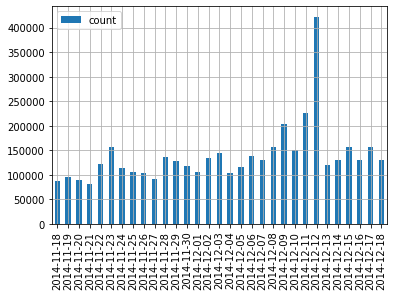

In [9]:
#属于商品子集p的操作个数
df_p = pd.read_csv('./tianchi_fresh_comp_train_item.csv')
#使用resetindex将index还原
df = pd.merge(df,df_p,on=['item_id']).set_index('time')
show_count_day(df)

In [10]:
def show_count_hour(date1):
    count_hour =  {}
    #设置初始值
    for i in range(24):
        time_str = date1+ ' %02.d'% i
        count_hour[time_str] = [0,0,0,0]
        temp = df[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1] +=temp[temp.index[j]]
    print(count_hour)

    #从字典类型生成DataFrame
    df_count_hour = pd.DataFrame.from_dict(count_hour,orient='index')
    df_count_hour.plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

{'2014-12-12 00': [29817, 336, 285, 758], '2014-12-12 01': [8736, 101, 288, 75], '2014-12-12 02': [13356, 24, 196, 22], '2014-12-12 03': [4530, 14, 42, 27], '2014-12-12 04': [4280, 11, 42, 10], '2014-12-12 05': [1243, 4, 46, 27], '2014-12-12 06': [6992, 20, 388, 60], '2014-12-12 07': [12673, 24, 102, 80], '2014-12-12 08': [19034, 40, 462, 558], '2014-12-12 09': [13913, 39, 176, 130], '2014-12-12 10': [43971, 55, 522, 210], '2014-12-12 11': [29353, 1662, 468, 140], '2014-12-12 12': [32532, 60, 211, 144], '2014-12-12 13': [9523, 65, 1811, 1745], '2014-12-12 14': [23214, 74, 182, 134], '2014-12-12 15': [9205, 51, 204, 122], '2014-12-12 16': [8948, 50, 145, 83], '2014-12-12 17': [20686, 225, 274, 165], '2014-12-12 18': [8288, 75, 109, 79], '2014-12-12 19': [19089, 48, 171, 118], '2014-12-12 20': [16837, 93, 198, 119], '2014-12-12 21': [20207, 85, 325, 176], '2014-12-12 22': [22404, 109, 373, 189], '2014-12-12 23': [25051, 1745, 1028, 197]}


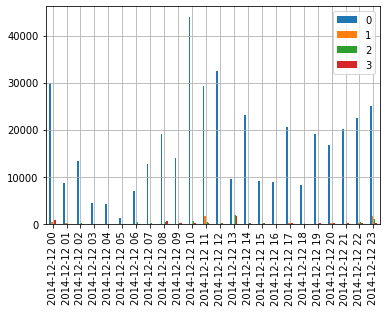

In [11]:
show_count_hour('2014-12-12')